In [5]:
# Import necessary modules
from read_roi import read_roi_zip
import pandas as pd
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import os
import seaborn as sns
from shapely.geometry import Polygon, Point
import sys
sys.path.insert(1, r'C:\Users\geertoosterbroek\Documents\Thesis\Code\mRNA-2-nuclei\code')
from helper_functions import subset
%matplotlib inline


In [3]:
# Load data
input_directory = r"C:\Users\geertoosterbroek\Documents\Thesis\Data\507_s7\input"
save_directory = r"C:\Users\geertoosterbroek\Documents\Thesis\Data\507_s7\data objects" #save objects which are time consuming
count_data = pd.read_csv(input_directory + r"\507_s7 mRNA counts.csv")
nuclei_rois = read_roi_zip(input_directory + r"\507_sc7_all_nuclei_RoiSet_crop.zip")
cell_rois = read_roi_zip(input_directory + r"\507_s7_all_cell_rois.zip")

# Data exploration

## mRNA counts

In [6]:
# Description of entire countset
print("Number of molecules: ", len(count_data))
group_sizes = count_data.groupby('target').size().sort_values(ascending=False)
print("\nCount per gene: \n ", group_sizes)
print("\nInfo on coordinates: ")
print("Min x: ", count_data['x'].min(), ", Max x: ", round(count_data['x'].max(), 2))
print("Min y: ", round(count_data['y'].min(), 2), ", Max y: ", count_data['y'].max())
# count_data.describe()

Number of molecules:  141652

Count per gene: 
  target
Lyz2       25758
Sftpc      22733
Scgb1a1    17527
Cldn18     14174
Cd74       13291
Ager       10756
Cyp2f2      9171
Fgfr2       7277
Napsa       6354
Rfp         6073
Etv5        3262
Lgi3        2019
Spry2       1775
Axin2        893
Ascl1        306
Calca        283
dtype: int64

 Info on coordinates: 
Min x:  2.5 , Max x:  6698.88
Min y:  2.74 , Max y:  4996.5


In [5]:
# Choose subset and describe subset
sub = subset(count_data)
sub.groupby('target').size()

target
Ager       183
Ascl1        1
Axin2        9
Calca        1
Cd74       170
Cldn18     202
Cyp2f2       3
Etv5        52
Fgfr2       71
Lgi3        24
Lyz2       290
Napsa      102
Rfp         66
Scgb1a1     10
Sftpc      268
Spry2       16
dtype: int64

## Plots whole tissue

In [8]:
fig_dir = r"C:\Users\geertoosterbroek\Documents\Thesis\Images"
%matplotlib inline


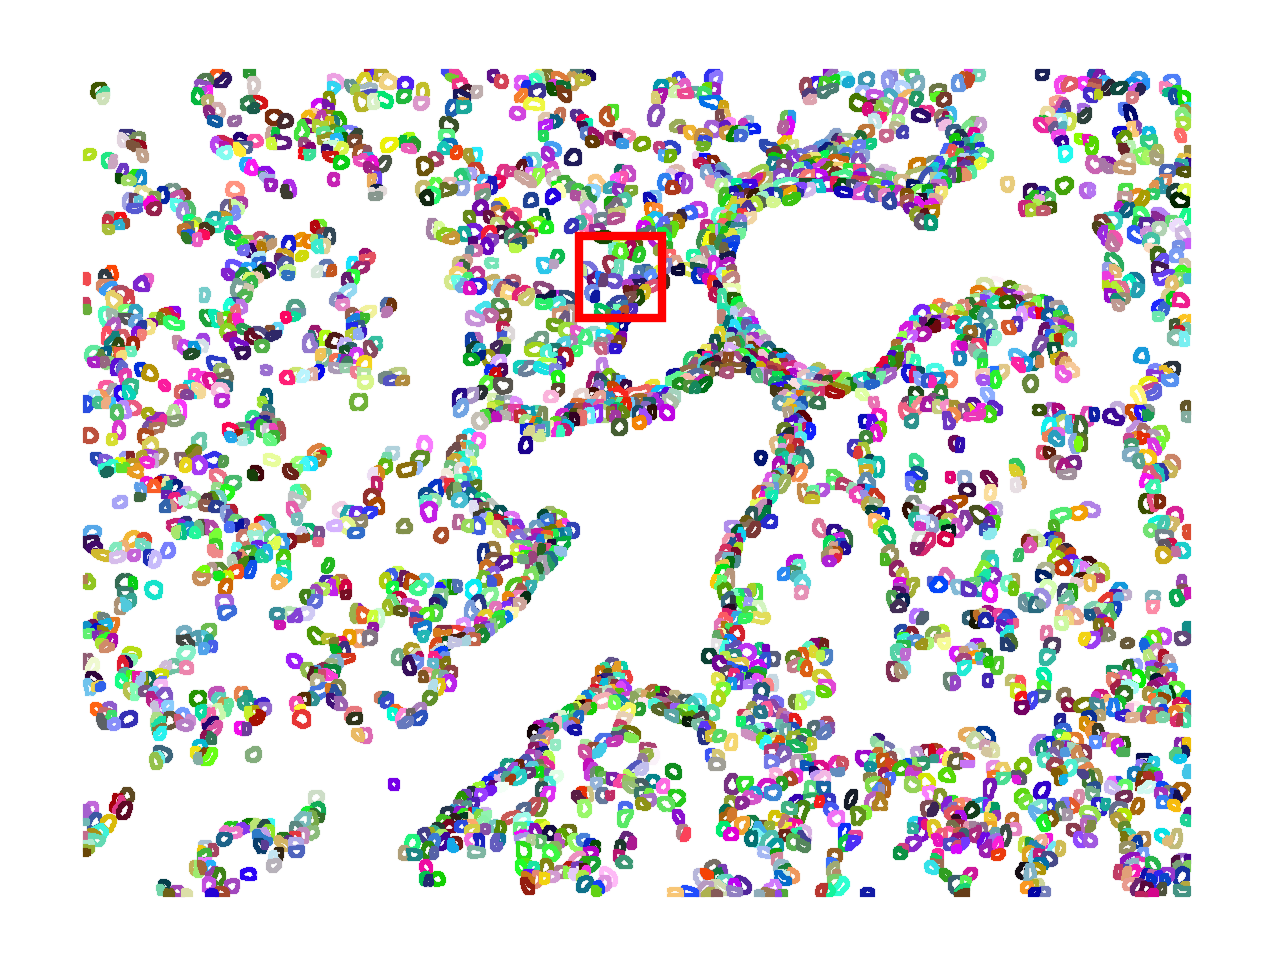

In [18]:
fig, ax = plt.subplots(dpi=300)
for key in cell_rois.keys():
    xy = np.column_stack((cell_rois[key]['x'], cell_rois[key]['y']))
    poly = patches.Polygon(xy)
    path = poly.get_path()
    patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor= np.random.rand(3,))
    ax.add_patch(patch)

ax.autoscale_view()
ax.invert_yaxis()
ax.set_aspect('equal')
ax.set_axis_off()

# Create a Rectangle patch
rect = patches.Rectangle((3000, 1000), 500, 500, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
fig.savefig(os.path.join(fig_dir,"Cell rois with highlight.png"), bbox_inches = 'tight', dpi = 300)

## Subset plots

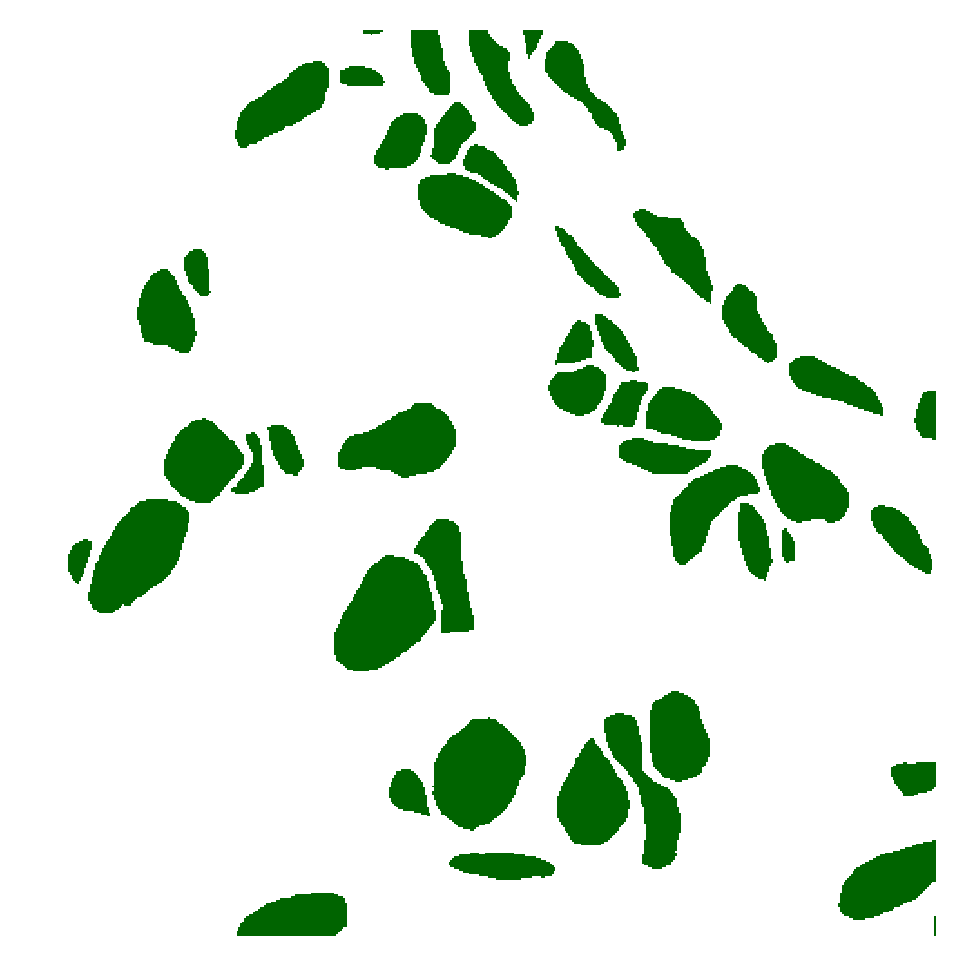

In [9]:
fig, ax = plt.subplots(dpi=300)
for key in nuclei_rois.keys():
    xy = np.column_stack((nuclei_rois[key]['x'], nuclei_rois[key]['y']))
    poly = patches.Polygon(xy)
    path = poly.get_path()
    patch = patches.PathPatch(path, facecolor='darkgreen', lw=0)
    ax.add_patch(patch)

ax.set_axis_off()
ax.set_aspect('equal')
ax.invert_yaxis()
ax.axis((3000,3500,1000,1500))
fig.savefig(os.path.join(fig_dir, "nuc_roisubset.png"),
            bbox_inches = 'tight', dpi=300)

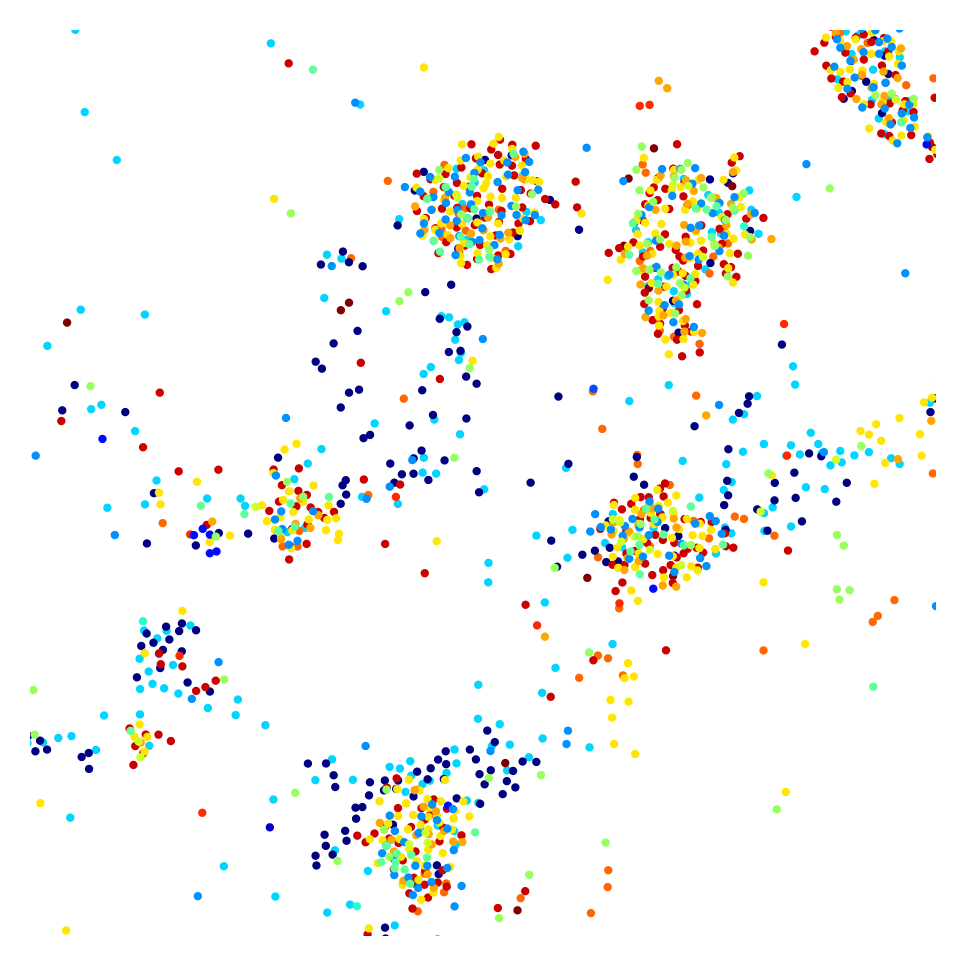

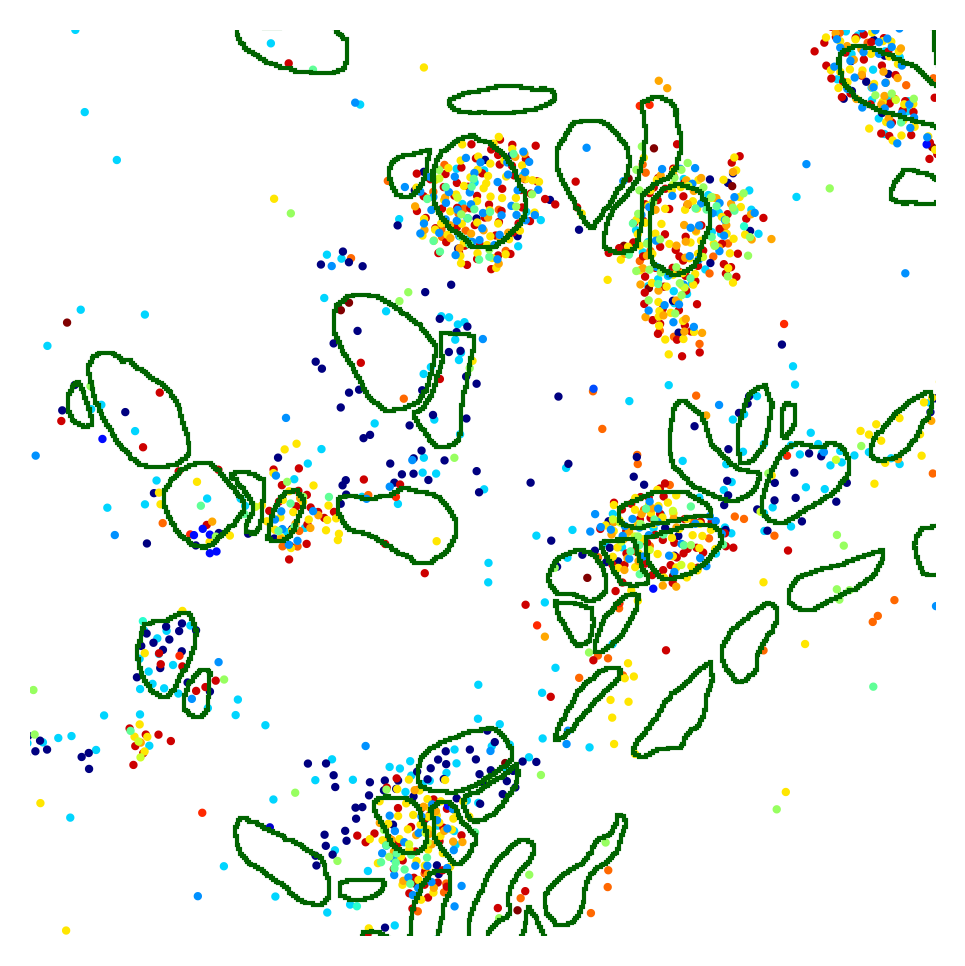

In [19]:
count_data['target'] = count_data['target'].astype('category')
count_data['color_coding'] = count_data['target'].cat.codes

# Without nuclei ROIs
fig, ax = plt.subplots(dpi=300)
ax.axis((3000,3500,1000,1500))
count_data.plot.scatter(x='x', y='y', c='color_coding',colormap='jet', ax=ax, s=1)
ax.collections[-1].colorbar.remove()
ax.set_axis_off()
ax.set_aspect('equal')
ax.invert_yaxis()

# plt.show()
fig.savefig(os.path.join(fig_dir, "subset.png"),
            bbox_inches = 'tight', dpi=300)

# With nuclei ROIs
fig, ax = plt.subplots(dpi=300)
for key in nuclei_rois.keys():
    xy = np.column_stack((nuclei_rois[key]['x'], nuclei_rois[key]['y']))
    poly = patches.Polygon(xy)
    path = poly.get_path()
    patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor= 'darkgreen')
    ax.add_patch(patch)

ax.axis((3000,3500,1000,1500))
count_data.plot.scatter(x='x', y='y', c='color_coding',colormap='jet', ax=ax, s=1)
ax.collections[-1].colorbar.remove()
ax.set_axis_off()
ax.set_aspect('equal')
ax.invert_yaxis()

# plt.show()
fig.savefig(os.path.join(fig_dir, "subset_nuclei.png"),
            bbox_inches = 'tight', dpi=300)

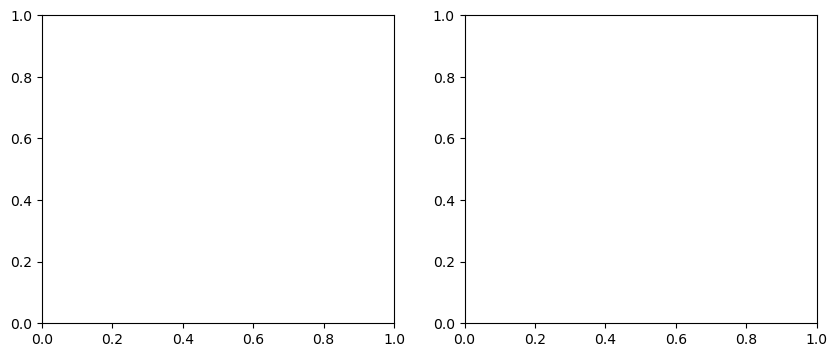

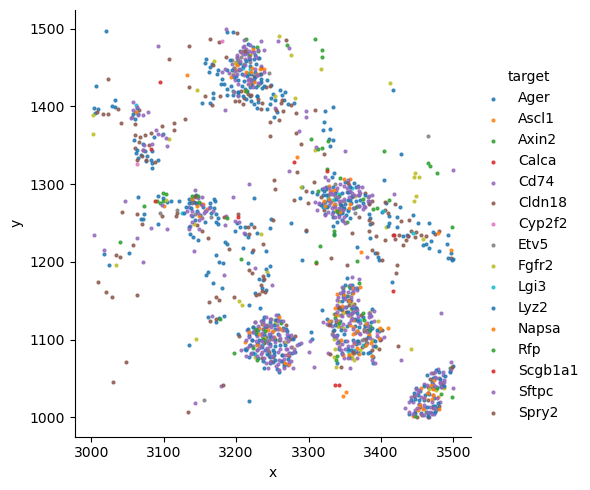

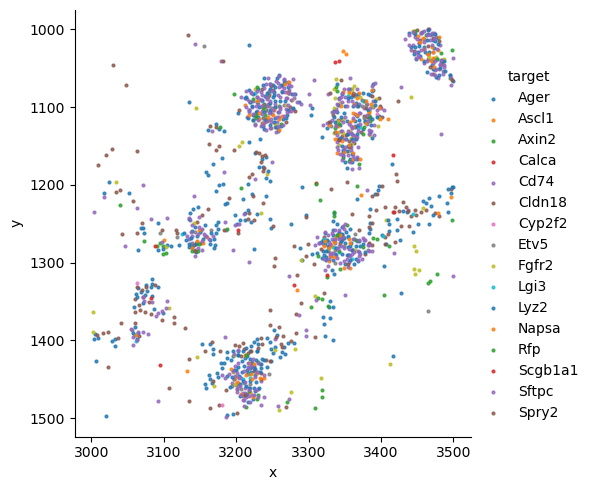

In [9]:
# Plot subset with nuclei ROIs
fig, ax = plt.subplots(dpi=1000)
ax = sns.lmplot(x='x', y='y', data=sub, fit_reg=False, hue='target', scatter_kws={"s":4}, palette="tab10")
# axs[1] = sns.lmplot(x='x', y='y', data=sub, fit_reg=False, hue='target', scatter_kws={"s":4}, palette="tab10")
# plt.show()
plt.gca().invert_yaxis()
plt.show()

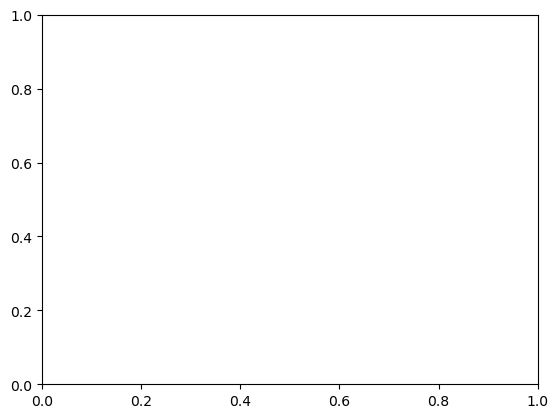

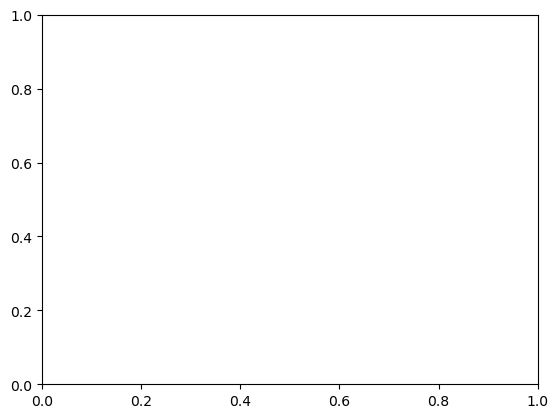

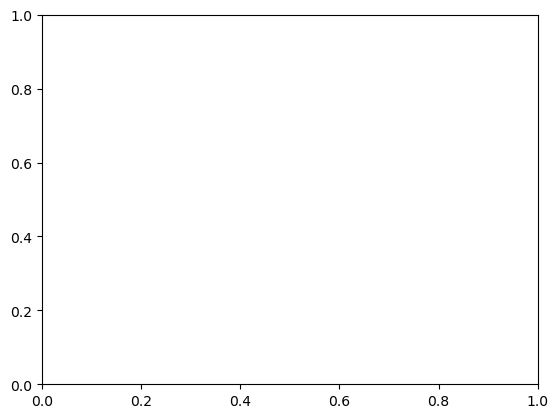

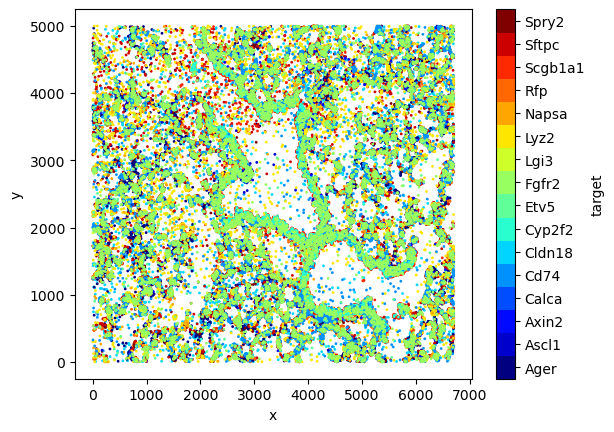

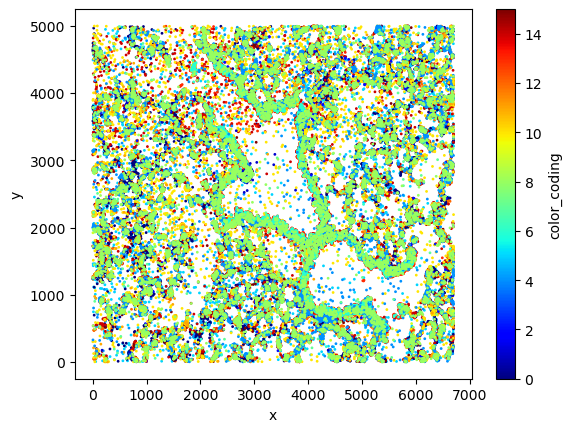

In [7]:
fig, ax = plt.subplots()
count_data['target'] = count_data['target'].astype('category')
count_data['color_coding'] = count_data['target'].cat.codes
count_data.plot.scatter(x='x', y='y', c='color_coding',colormap='jet', ax=ax, s=1)
plt.show()



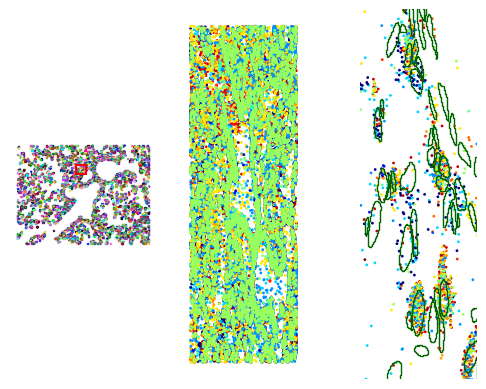

In [3]:
fig, axs = plt.subplots(1,3)

for key in cell_rois.keys():
    xy = np.column_stack((cell_rois[key]['x'], cell_rois[key]['y']))
    poly = patches.Polygon(xy)
    path = poly.get_path()
    patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor= np.random.rand(3,))
    axs[0].add_patch(patch)

axs[0].autoscale_view()
axs[0].invert_yaxis()
axs[0].set_axis_off()
axs[0].set_aspect('equal')
# Add rectangular patch to image
rect = patches.Rectangle((3000, 1000), 500, 500, linewidth=1.5, edgecolor='r', facecolor='none')
axs[0].add_patch(rect)

count_data['target'] = count_data['target'].astype('category')
count_data['color_coding'] = count_data['target'].cat.codes

# fig_dir = r"C:\Users\geertoosterbroek\Documents\Thesis\Meetings\Images"

# Without nuclei ROIs
count_data.plot.scatter(x='x', y='y', c='color_coding',colormap='jet', ax=axs[1], s=1)
axs[1].collections[-1].colorbar.remove()
axs[1].set_axis_off()


# With nuclei ROIs
for key in nuclei_rois.keys():
    xy = np.column_stack((nuclei_rois[key]['x'], nuclei_rois[key]['y']))
    poly = patches.Polygon(xy)
    path = poly.get_path()
    patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor= 'darkgreen')
    axs[2].add_patch(patch)

axs[2].axis((3000,3500,1000,1500))
count_data.plot.scatter(x='x', y='y', c='color_coding',colormap='jet', ax=axs[2], s=1)
axs[2].collections[-1].colorbar.remove()
axs[2].set_axis_off()
# fig.savefig(os.path.join(fig_dir, "subset_nuclei.png"),
#             bbox_inches = 'tight', dpi=1000)
plt.show()
# fig.savefig("Cell rois with highlight.png", bbox_inches = 'tight', pad_inches = 0)

## Nuclei and Cells ROIs

In [54]:
print("Number of nuclei: ", len(nuclei_rois))
print("\nContent of first nucleus ROI: ")
first_key = list(nuclei_rois.keys())[0]
print(first_key)
print(nuclei_rois[first_key])



Number of nuclei:  3488
Content of first nucleus ROI: 
0001-0009
{'type': 'traced', 'x': [1004, 1005, 1005, 1006, 1006, 1007, 1007, 1008, 1008, 1009, 1009, 1008, 1008, 1007, 1007, 1006, 1006, 1005, 1005, 1004, 1004, 1002, 1002, 1000, 1000, 998, 998, 990, 990, 987, 987, 986, 986, 985, 985, 984, 984, 985, 985, 986, 986, 1004], 'y': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 9, 9, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 17, 17, 16, 16, 14, 14, 9, 9, 5, 5, 2, 2, 0, 0], 'n': 42, 'width': 0, 'name': '0001-0009', 'position': 0}


# Investigate mRNA distribution over nuclei and cells

In [6]:
# Create mRNA count per nuclei object

if os.path.exists(save_directory + r"\nuclei_counts.pkl"):
    nuclei_counts = pd.read_pickle(save_directory + r"\nuclei_counts.pkl")
else:

    nuclei_counts = pd.Series(dtype=object)


    for ind, key in enumerate(nuclei_rois.keys()):
        x, y = nuclei_rois[key]['x'], nuclei_rois[key]['y']
        xy = np.column_stack((x,y))
        poly = patches.Polygon(xy) # We first make a polygon to get a closed path
        path = poly.get_path()
        number_in_roi = sum(path.contains_points(count_data[['x', 'y']])) #sum(count_data.apply(is_in_roi, path=path, axis="columns"))
        nuclei_counts.loc[key] = number_in_roi

    nuclei_counts.to_pickle(save_directory + r"\nuclei_counts.pkl")

print(nuclei_counts.head())
print(len(nuclei_counts))

0001-0009    2
0002-0002    0
0003-0018    9
0004-0016    2
0005-0022    9
dtype: int32
3488


In [8]:
# Create mRNA count per cell object
#
# if os.path.exists(save_directory + r"\cell_counts.pkl"):
#     cell_counts = pd.read_pickle(save_directory + r"\cell_counts.pkl")
# else:

cell_counts = pd.Series(dtype=object)
count_data = subset(count_data)

for ind, key in enumerate(cell_rois.keys()):
    x, y = cell_rois[key]['x'], cell_rois[key]['y']
    xy = np.column_stack((x,y))
    poly = patches.Polygon(xy) # We first make a polygon to get a closed path
    path = poly.get_path()
    number_in_roi = sum(path.contains_points(count_data[['x', 'y']])) #sum(count_data.apply(is_in_roi, path=path, axis="columns"))
    cell_counts.loc[key] = number_in_roi

cell_counts.to_pickle(save_directory + r"\cell_counts_subset.pkl")
    
print(cell_counts.head())
print(len(cell_counts))

0001-0009    0
0002-0017    0
0003-0012    0
0004-0005    0
0005-0010    0
dtype: int32
3483


Empty nuclei:  315
Over 100 molecules:  26


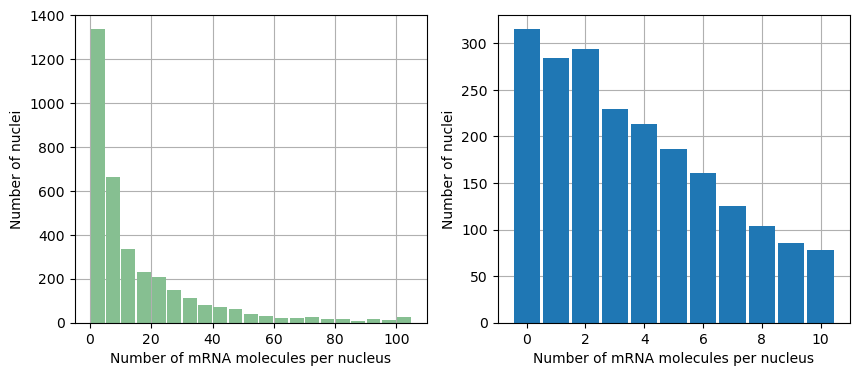

In [33]:
print("Empty nuclei: ", sum(nuclei_counts==0))
print("Over 100 molecules: ", sum(nuclei_counts>100)) #np.clip(nuclei_counts, 0, 100)
fig, axs = plt.subplots(1,2, figsize=(10,4))
bins = np.append(np.linspace(0,100,21), 105)
clipped = np.clip(nuclei_counts, 0, 100.5)
clipped.hist(bins=bins, color='#86bf91', zorder=2, rwidth=0.9, ax=axs[0])
axs[0].set_ylabel("Number of nuclei")
axs[0].set_xlabel("Number of mRNA molecules per nucleus")
nuclei_counts.hist(bins=np.linspace(-0.5,10.5,12), zorder=2, rwidth=0.9, ax=axs[1])
axs[1].set_ylabel("Number of nuclei")
axs[1].set_xlabel("Number of mRNA molecules per nucleus")
plt.show()

Empty cells:  0
Over 100 molecules:  3


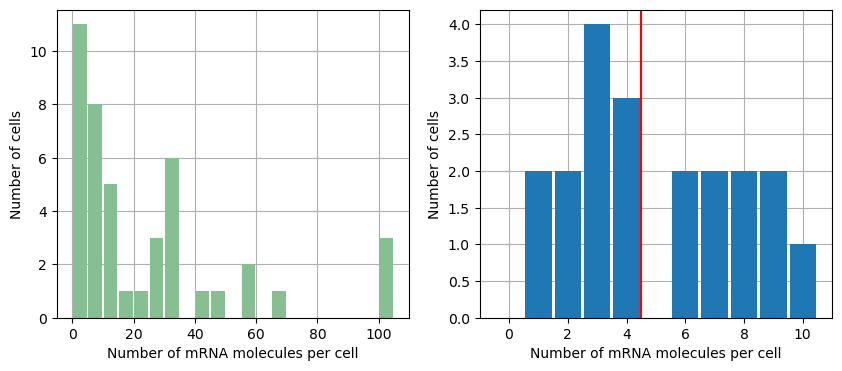

In [9]:
fig_dir = r"C:\Users\geertoosterbroek\Documents\Thesis\Meetings\Images"
cell_counts = cell_counts[cell_counts>0]
print("Empty cells: ", sum(cell_counts==0))
print("Over 100 molecules: ", sum(cell_counts>100)) #np.clip(nuclei_counts, 0, 100)
fig, axs = plt.subplots(1,2, figsize=(10,4))
bins = np.append(np.linspace(0,100,21), 105)
clipped = np.clip(cell_counts, 0, 100.5)
clipped.hist(bins=bins, color='#86bf91', zorder=2, rwidth=0.9, ax=axs[0])
axs[0].set_ylabel("Number of cells")
axs[0].set_xlabel("Number of mRNA molecules per cell")
cell_counts.hist(bins=np.linspace(-0.5,10.5,12), zorder=2, rwidth=0.9, ax=axs[1])
axs[1].set_ylabel("Number of cells")
axs[1].set_xlabel("Number of mRNA molecules per cell")
axs[1].axvline(4.5, c='red')
plt.show()
# fig.savefig(os.path.join(fig_dir, "count_per_cell.png"),
#             bbox_inches = 'tight', dpi=300)

In [3]:
total_size = 0
for key in cell_rois.keys():
    xy = np.column_stack((cell_rois[key]['x'], cell_rois[key]['y']))
    poly = Polygon(xy)
    # get minimum bounding box around polygon
    box = poly.minimum_rotated_rectangle
    # get coordinates of polygon vertices
    x, y = box.exterior.coords.xy

    # get length of bounding box edges
    edge_length = (Point(x[0], y[0]).distance(Point(x[1], y[1])), Point(x[1], y[1]).distance(Point(x[2], y[2])))

    # get length of polygon as the longest edge of the bounding box
    length = max(edge_length)
    total_size += length

average_size = total_size / len(cell_rois)


In [8]:
average_size*0.114
8.5/4.29/0.114

17.380280538175274